In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import yaml

In [2]:
#Loading cleaned data
df = pd.read_csv('../data/processed/cleaned_telco.csv')
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalSpending,tenure_group,gender_Female,gender_Male,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,29.85,new,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,1936.30,veteran,False,True,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,107.70,new,False,True,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,1903.50,veteran,False,True,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,141.40,new,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [3]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalSpending', 'tenure_group', 'gender_Female', 'gender_Male',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contrac

In [4]:
print("Unique values in 'Churn':", df['Churn'].unique())


Unique values in 'Churn': [0 1]


In [5]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalSpending', 'tenure_group', 'gender_Female', 'gender_Male',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contrac

In [6]:
df['TotalSpending'] = df['tenure'] * df['MonthlyCharges']

In [7]:
#Define target and features
target = 'Churn'
X_raw = df.drop(columns=[target])
y = df['Churn']

In [8]:
X_encoded = pd.get_dummies(X_raw, drop_first=True)
print("Encoded features recreated.")
print('TotalSpending' in X_encoded.columns)

Encoded features recreated.
True


In [9]:
#One-hot encode categorical features (including 'tenure_group')
X_encoded = pd.get_dummies(X_raw, drop_first=True)
X_encoded['TotalSpending'] = df['TotalSpending']
#Drop highly correlated features
corr_matrix = X_encoded.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Drop columns with correlation > 0.85
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
X_encoded.drop(columns=to_drop, inplace=True)
print("Dropped due to high correlation:", to_drop)

Dropped due to high correlation: ['TotalSpending', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'PaperlessBilling_Yes', 'tenure_group_veteran']


In [10]:
# print(X_encoded.columns.tolist())

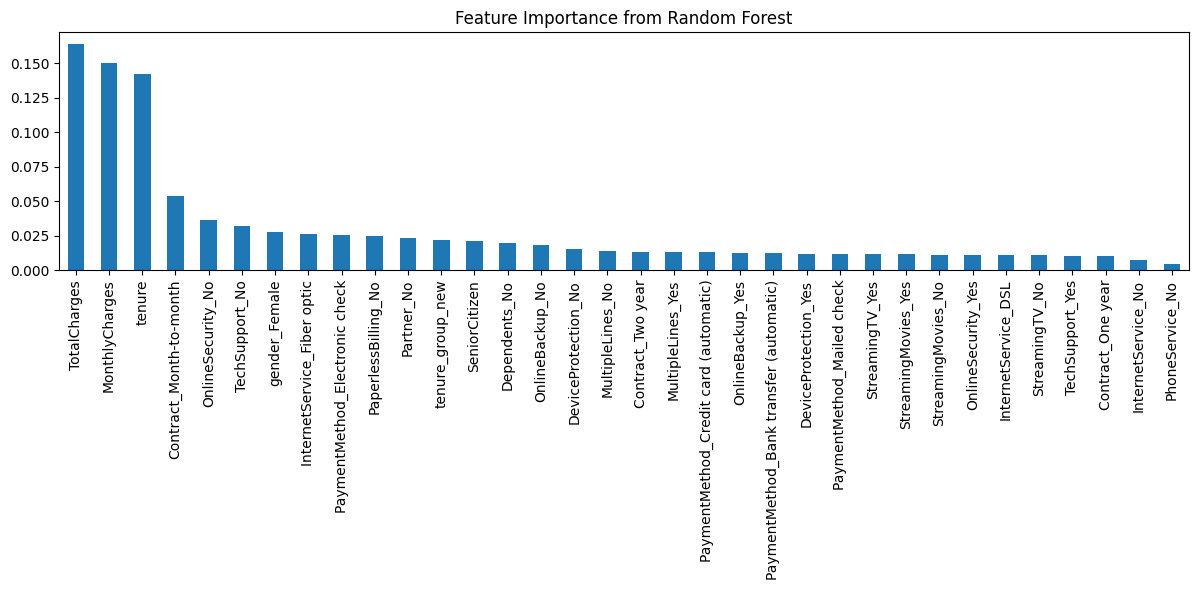

In [11]:
#Feature importance - Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y)

feat_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(12, 6), title='Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

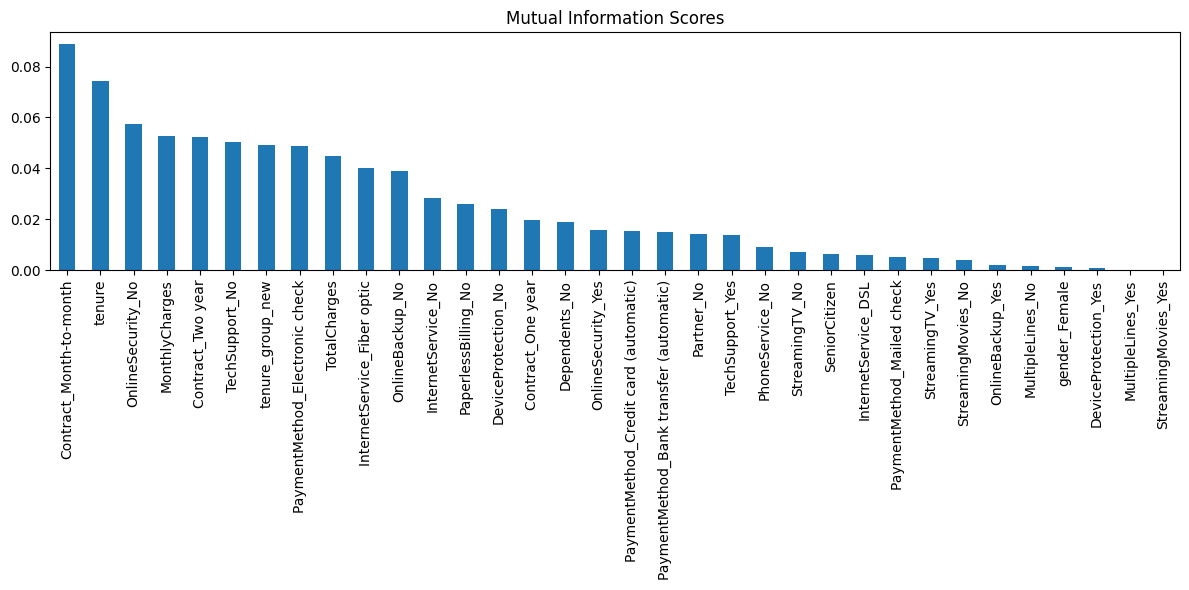

In [12]:
#Mutual information
mutual_info = pd.Series(mutual_info_classif(X_encoded, y), index=X_encoded.columns)
mutual_info.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Mutual Information Scores')
plt.tight_layout()
plt.show()

In [13]:
print(X_encoded.columns.tolist())

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_new']


In [14]:
X_encoded['TotalSpending'] = df['TotalSpending']
print('TotalSpending' in df.columns)          # Should be True
print('TotalSpending' in X_raw.columns)       # Should be True
print('TotalSpending' in X_encoded.columns)   # Should be True
print(X_encoded.columns.tolist())

True
True
True
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_new', 'TotalSpending']


In [15]:
#Manually selected top features from importance analysis
selected_features = [
    'tenure', 'MonthlyCharges', 'TotalCharges', 'TotalSpending',
    'Contract_Two year', 'InternetService_Fiber optic', 'OnlineSecurity_No',
    'TechSupport_No', 'PaymentMethod_Electronic check',
    'SeniorCitizen', 'Dependents_No', 'PaperlessBilling_No',
    'Contract_Month-to-month'
]

#Save selected features only
X_final = X_encoded[selected_features]
os.makedirs('../1_data/processed', exist_ok=True)
X_final.to_csv('../1_data/processed/final_features_df.csv', index=False)
print("Final selected features saved to final_features_df.csv!")

Final selected features saved to final_features_df.csv!


In [ ]:
#Save selected features to config.yaml
config = {'selected_features': selected_features}
os.makedirs('../config', exist_ok=True)
with open('../config/config.yaml', 'w') as f:
    yaml.dump(config, f)

print("Selected features written to config.yaml")

Selected features written to config.yaml
